In [1]:
#We first import the calculator script
from calculator import *

#import plotting library
import matplotlib.pyplot as plt

In [2]:
#This shows how to use mlf

#Converts a matrix typed in MATLAB format into a numpy array
test_arr = mlf('1 2 3; 4 5 6')
print(test_arr)


[[1. 2. 3.]
 [4. 5. 6.]]


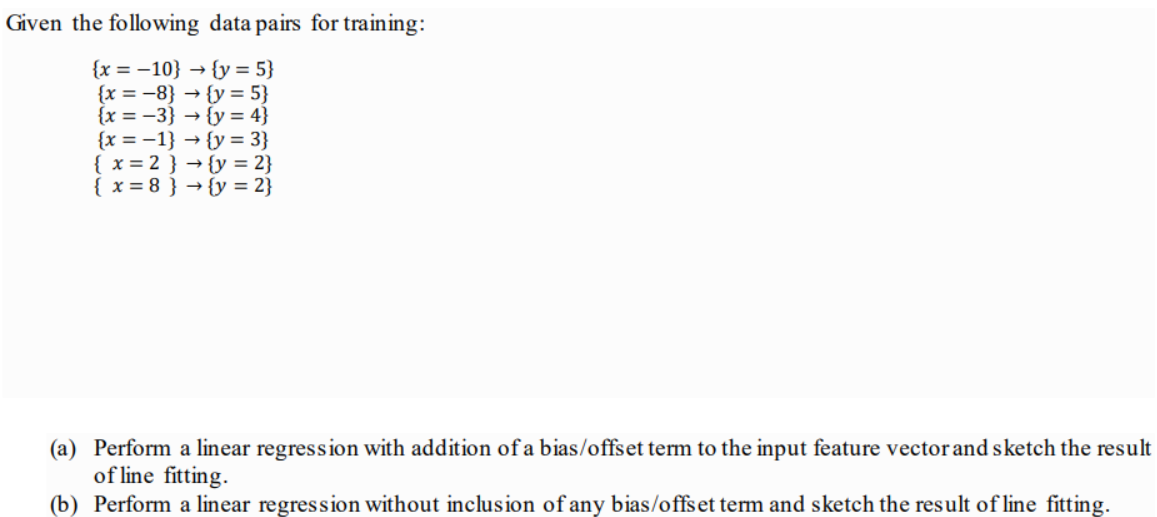

[[ 3.10550459]
 [-0.19724771]]


[[-0.35123967]]


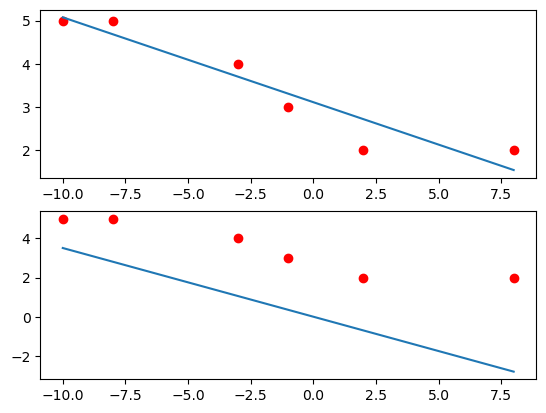

In [3]:
#This shows how to use regress and addbias

#You can instantiate x and y as numpy arrays first, but I find the MATLAB format easier to type
x = mlf('-10;-8;-3;-1;2;8'); y = mlf('5;5;4;3;2;2') 


#regression with bias
x_bias = addbias(x) #We add a bias here
w_bias = regress(x_bias,y) #We perform regression
print(w_bias)
print("\n")


#regression without bias
w = regress(x,y) #We perform regression
print(w)

#Plotting is optional. If you would want to learn plotting, go to https://matplotlib.org/stable/users/getting_started/index.html
ax = plt.subplots(2)[1]
ax[0].plot(x, y, 'ro')
ax[0].plot(list(x),list(x_bias@w_bias), label = "regression fn")
ax[1].plot(x, y, 'ro')
ax[1].plot(list(x),list(x@w), label = "regression fn")


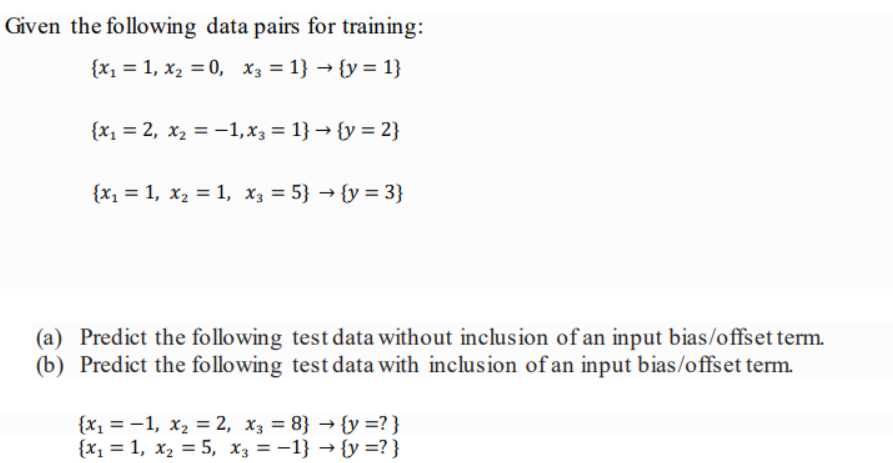

In [4]:
#This shows how to use predict

#convert all this into a design matrix and target matrix first
x = mlf('1 0 1 ; 2 -1 1 ; 1 1 5'); y = mlf('1;2;3'); x_test = mlf('-1 2 8; 1 5 -1')

#regression without bias
w = regress(x,y)
print("\n prediction without bias")
print(predict(x_test,w)) #Prediction step
print("\n")


#regression with bias
x_bias = addbias(x)
w_bias = regress(x_bias,y)
print("\n prediction with bias")
print(predict(addbias(x_test),w_bias)) #Prediction step



 prediction without bias
[[ 3.66666667]
 [-3.66666667]]



 prediction with bias
[[ 3.33333333]
 [-2.61904762]]


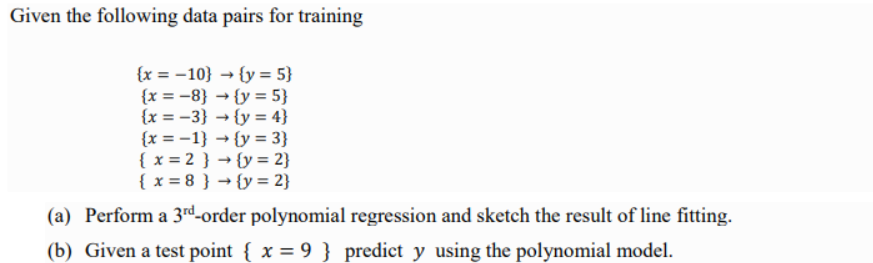

[[ 2.68935636]
 [-0.37722517]
 [ 0.01343815]
 [ 0.00285772]]


[2.46609771]


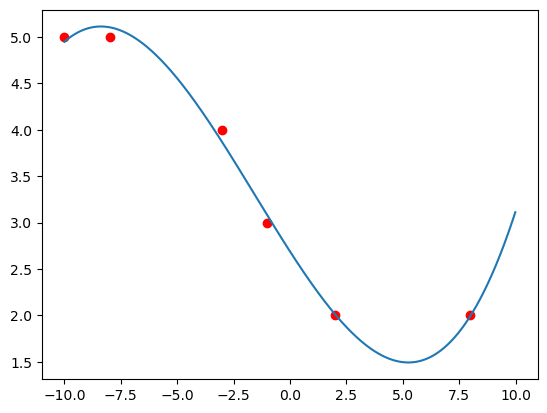

In [5]:
#This shows how to use poly_expand

x = mlf('-10;-8;-3;-1;2;8'); y = mlf('5;5;4;3;2;2')


#expand x, and solve
x_poly = poly_expand(x,3) #Perform a polynomial expansion on x first
w = regress(x_poly,y) #Then regress
print(w)
print('\n')

#plotting
plt.plot(x,y,'ro')
x_plot = poly_expand([[i*0.01] for i in range(-1000,1000)],3)
plt.plot([[i*0.01] for i in range(-1000,1000)],x_plot@w)

#predict x = 9
y_pred = predict(poly_expand([9],3),w)
print(y_pred)

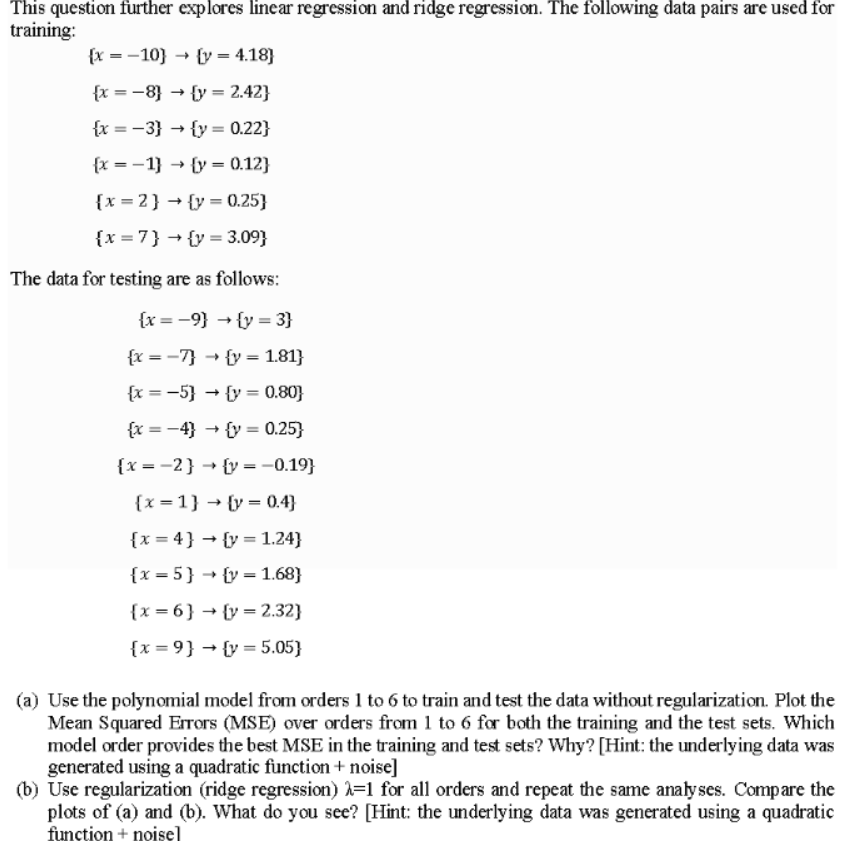

[2.3585531011197105, 0.008456477077018429, 0.008356013483798837, 0.0018079762223903442, 0.0007264963730617796, 0.00019347846088123475]
[3.2755677280832316, 0.030169873887064685, 0.03141714830425439, 0.09393142698403062, 0.4368968008239905, 6.020235935063555]


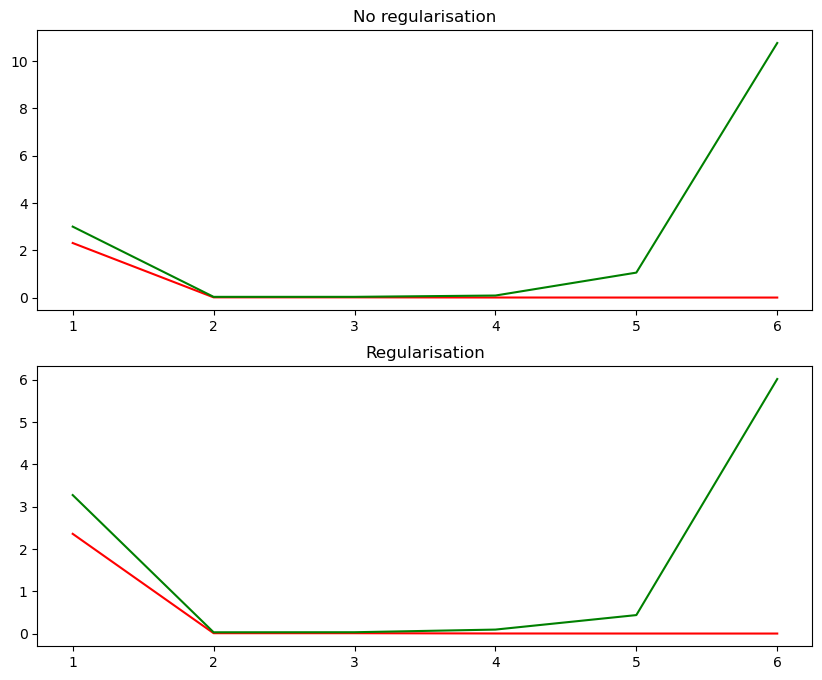

In [6]:
#This example shows how to use ridge_regress

x_train = mlf('-10;-8;-3;-1;2;7'); y_train = mlf('4.18;2.42;0.22;0.12;0.25;3.09')
x_test = mlf('-9;-7;-5;-4;-2;1;4;5;6;9'); y_test = mlf('3;1.81;0.8;0.25;-0.19;0.4;1.24;1.68;2.32;5.05')


fig, ax = plt.subplots(2)

#part a)
test_mse = []
train_mse = []
for deg in range(1,7):
    x_train_expand = poly_expand(x_train,deg)
    w = regress(x_train_expand,y_train)
    train_mse.append(((predict(x_train_expand,w) - y_train).T @(predict(x_train_expand,w) - y_train)/len(y_train))[0][0])
    y_pred = predict(poly_expand(x_test,deg),w)
    test_mse.append(((y_pred - y_test).T @ (y_pred - y_test)/len(y_test))[0][0])

    
# see that MSE for training goes down as degree increases 
# but MSE for testing goes up as degree passes 2
# overfitting happens for too high a degree, and underfitting happens for too low a degree
ax[0].plot([i for i in range(1,7)],train_mse, 'r')
ax[0].plot([i for i in range(1,7)],test_mse, 'g')
ax[0].set_title("No regularisation")


#part b)
test_mse = []
train_mse = []
for deg in range(1,7):
    x_train_expand = poly_expand(x_train,deg)
    w = ridge_regress(x_train_expand,y_train,1) #This is where we do ridge regression
    train_mse.append(((predict(x_train_expand,w) - y_train).T @(predict(x_train_expand,w) - y_train)/len(y_train))[0][0])
    y_pred = predict(poly_expand(x_test,deg),w)
    test_mse.append(((y_pred - y_test).T @ (y_pred - y_test)/len(y_test))[0][0])
print(train_mse)
print(test_mse)
    
# notice that regularisation reduces overfitting
ax[1].plot([i for i in range(1,7)],train_mse,'r')
ax[1].plot([i for i in range(1,7)],test_mse,'g')
ax[1].set_title("Regularisation")

fig.set_size_inches(10, 8)

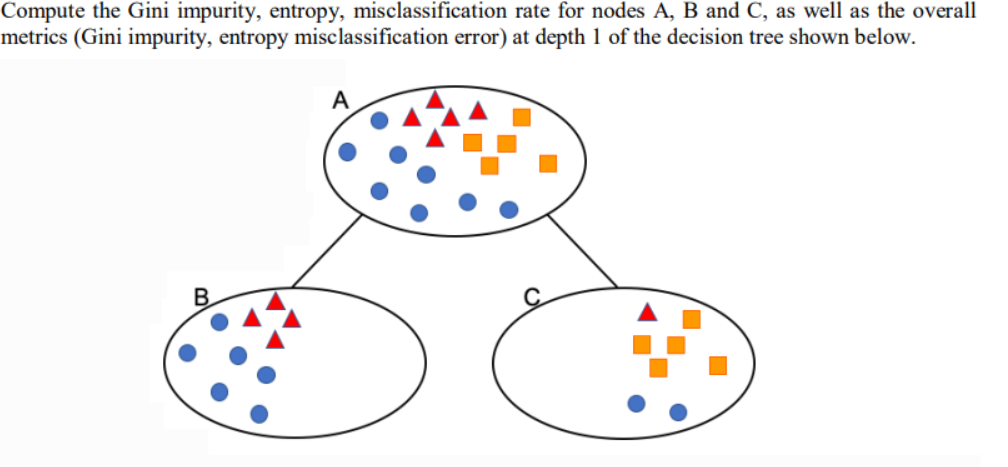

In [7]:
#This shows how to use impurity

gini = impurity([[1,1,1,1,0,0,0,0,0,0],[1,0,0,2,2,2,2,2]], 'g')
entropy = impurity([[1,1,1,1,0,0,0,0,0,0],[1,0,0,2,2,2,2,2]], 'e')
misclass = impurity([[1,1,1,1,0,0,0,0,0,0],[1,0,0,2,2,2,2,2]], 'm')

print("At depth 1, gini: " + str(gini) + " entropy: " + str(entropy) + " misclass: " + str(misclass))

At depth 1, gini: 0.5027777777777778 entropy: 1.116659192783882 misclass: 0.3888888888888889


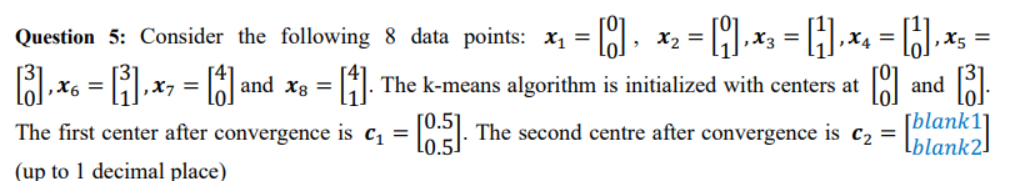

In [8]:
#This shows how to use kmeans_train. Ignore the red warning

X = [[0,0],[0,1],[1,1],[1,0],[3,0],[3,1],[4,0],[4,1]]; c = [[0,0],[3,0]]
print(kmeans_train(X,2,c))

[[0.5 0.5]
 [3.5 0.5]]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


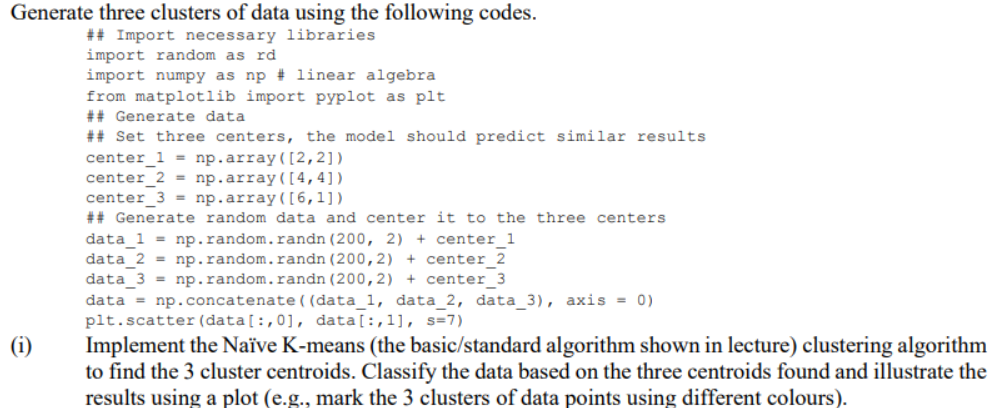

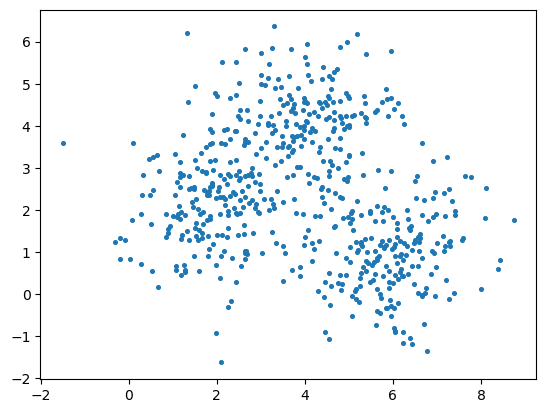

In [9]:
#Copy and paste code from qn

## Import necessary libraries
import random as rd
import numpy as np # linear algebra
from matplotlib import pyplot as plt
## Generate data
## Set three centers, the model should predict similar results
center_1 = np.array([2,2])
center_2 = np.array([4,4])
center_3 = np.array([6,1])
## Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3
data = np.concatenate((data_1, data_2, data_3), axis = 0)
plt.scatter(data[:,0], data[:,1], s=7)

[[4.05868685 4.17323889]
 [5.92293536 0.9462161 ]
 [1.86939118 2.03387029]]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


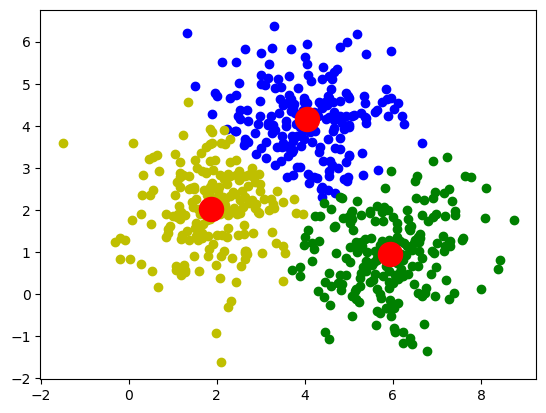

In [10]:
#This shows how to use kmeans_train and predict_kmeans
nodes = kmeans_train(data,3) #Train centroids
print(nodes)

#plot nodes
clusters = predict_kmeans(data,nodes) #Predict points
    
plt.scatter(np.array(clusters[0])[:,0], np.array(clusters[0])[:,1],c='b')
plt.scatter(np.array(clusters[1])[:,0], np.array(clusters[1])[:,1],c='g')
plt.scatter(np.array(clusters[2])[:,0], np.array(clusters[2])[:,1],c='y')
plt.scatter(np.array(nodes)[:,0], np.array(nodes)[:,1], s=300,c='r')